## Trasformazioni geometriche

# Morphing di immagini 

Rebagliati Valeria 4852454

### Introduzione:
Morphing: consiste nella trasformazione fluida, graduale e senza soluzione di continuità tra due immagini di forma diversa, che possono essere oggetti, persone, volti, paesaggi.

Per farlo è necessario individuare molti punti significativi dell'immagine, creando una sorta di griglia e deformarla per renderla più simile all'immagine finale, e viceversa.


### Obbiettivi:
* Allineare i soggetti di due immagini, tramite trasformazioni geometriche di base per fonderle in modo graduale, visualizzando i passi intermedi della fusione


In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import array as arr

from skimage import transform
from skimage.transform import resize

In [2]:
from skimage import data, io, color

from matplotlib.animation import FuncAnimation
from IPython import display


from PIL import Image

Prerequisito necessario per le prossime trasformazioni è che le immagini debbano avere le stesse dimensioni



La funzione che segue restituisce una sequenza di immagini che è una fusione tra le due di partenza, nella sequenza si parte con la prima immagine che ha molto peso e via via ne ha più la seconda; l'immagine centrale della sequenza è la media delle due.

La funzione implementa la seguente formula:
### I(t) = (1-t)I_1+tI_2



In [3]:
def blending(img1, img2, t):
    
    blend=[]
    blend.append([])
    
    for i in range(0,len(t)):
        blend.append((1-t[i])*img1+t[i]*img2)
        
    return blend
    


Proviamo ad applicare la funzione a due immagini molto semplici due rettangoli: uno rosso e uno giallo

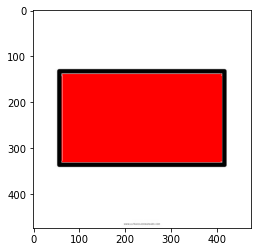

In [4]:
rrosso = plt.imread('img/retrosso.png')
plt.imshow(rrosso,cmap=plt.cm.gray)

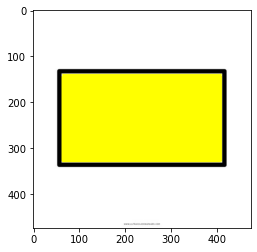

In [5]:
rgiallo = plt.imread('img/retgiallo.png')
plt.imshow(rgiallo,cmap=plt.cm.gray)


Applichiamo la funzione blending() alle due immagini:

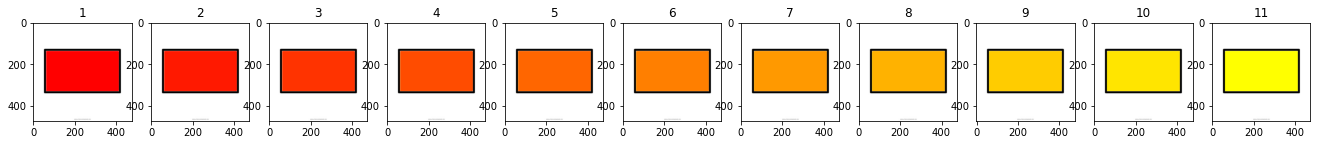

In [6]:
t=[ 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1 ]

I_t = blending(rrosso,rgiallo,t) 


#plt.imshow(I_t[0])

plt.figure(figsize=(25,15))

for i in range(1,len(I_t)):
    plt.subplot(1,len(I_t),i)
    plt.imshow(I_t[i])
    plt.title(i)



Ora proviamo ad applicare l'algoritmo a due volti umani di due attori che si assomigliano molto, prendiamo due immagini delle stesse dimensioni dove i volti sono molto allineati

(769, 568, 3)


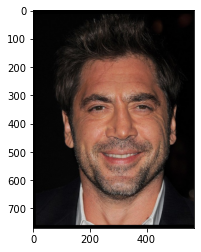

In [7]:
volto1 = plt.imread('img/volto1.jpg')
print(volto1.shape)
plt.imshow(volto1,cmap=plt.cm.gray)

(769, 568, 3)


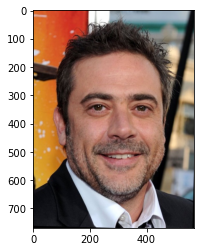

In [8]:
volto2 = plt.imread('img/volto2.jpg')
print(volto2.shape)
plt.imshow(volto2,cmap=plt.cm.gray)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


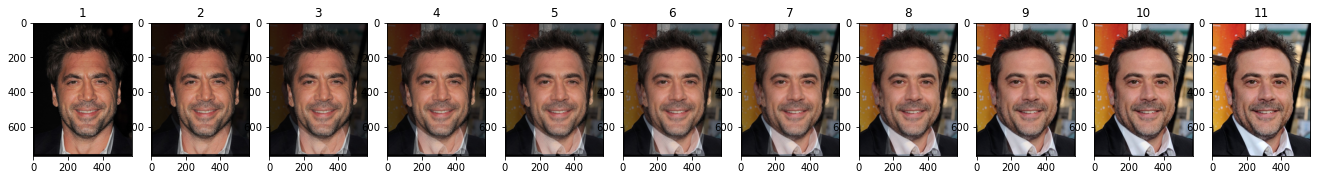

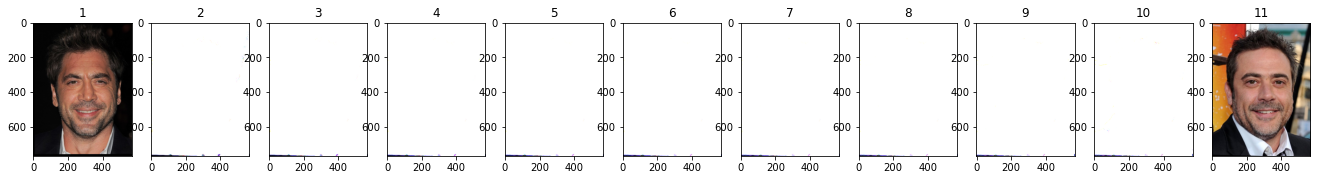

In [9]:
t=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

I_t = blending(volto1,volto2,t) 

plt.figure(figsize=(25,15))

for i in range(1,len(I_t)):
    plt.subplot(1,len(I_t),i)
    plt.imshow(I_t[i].astype(int))
    plt.title(i)
    
plt.figure(figsize=(25,15))

for i in range(1,len(I_t)):
    plt.subplot(1,len(I_t),i)
    plt.imshow(I_t[i])
    plt.title(i)

Se modifichiamo le immagini di partenza portandole in scala di grigi otteniamo:

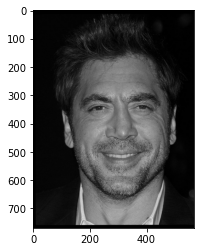

In [10]:
img = color.rgb2gray(volto1)
plt.imshow(img,cmap=plt.cm.gray)

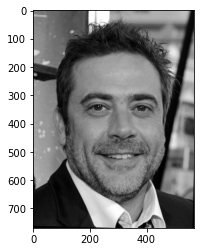

In [11]:
img2 = color.rgb2gray(volto2)
plt.imshow(img2,cmap=plt.cm.gray)

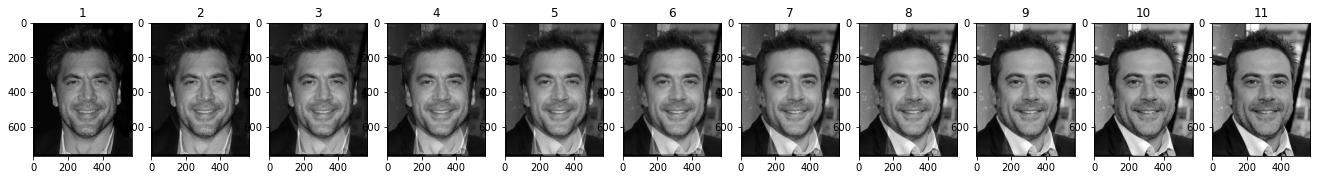

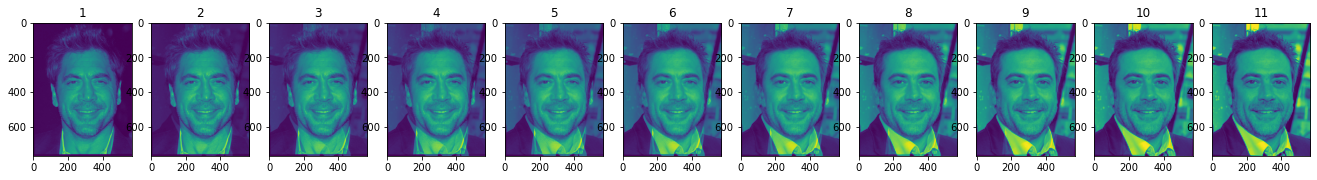

In [12]:
t=[ 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

I_t = blending(img,img2,t) 


plt.figure(figsize=(25,15))

for i in range(1,len(I_t)):
    plt.subplot(1,len(I_t),i)
    plt.imshow(I_t[i], cmap='gray')
    plt.title(i)
    
plt.figure(figsize=(25,15))

for i in range(1,len(I_t)):
    plt.subplot(1,len(I_t),i)
    plt.imshow(I_t[i])
    plt.title(i)


### Analisi sperimentale (versione2):

Sia nel caso a colori che in quello in scala di grigi ho ottenuto una fusione graduale dei due volti, anche se con alcune difficoltà dovute alla visualizzazione con la funzione imshow.

Infatti in un primo momento con le immagini a colori non ottenevo il blending, la trasformazione mi appariva come nel secondo caso: una sequenza di immagini bianche, con una leggera chiazza di colore sulla parte infeririore delle immagini.

Avendo problemi con la fusione di immagini a colori ho provato a portare le due immagini in scala di grigi, ed effettivamente così ottenevo l'effetto di fusione ma le immagini apparivano sui toni del blu/verde/giallo.

Dopo vari tentativi sono riuscita a sistemare il blending in entrambi i casi: nel primo ho applicato il metodo .astype(int) ad ogni immagine visualizzata, per il secondo ho usato l'attributo cmap=plt.cm.gray.

### Analisi sperimentale(versione1):
* ho eseguito il morphing delle due immagini sia a colori che in scala di grigi perchè ho avuto problemi nella visualizzazione delle immagini a colori, per risolvere il problema ho dovuto applicare il metodo ".astype(int)" alle immagini della sequenza altrimenti venivano visualizzate come tutte bianche.
* Mentre per il morphing in scala di grigi se non aggiungo cmap=plt.cm.gray, le immagini diventano di colori sulla scala del blu/verde/giallo

Per avere una fusione più graduale è necessario distorcere le due immagini per farle assomigliare l'una all'altra.

La funzione di warp che implemento di seguito crea delle "onde" nell'immagine, in questo modo alza e abbassa dei punti dell'immagine creando delle sovrapposizioni

Formula della trasformazione:
### x(u,v) u 20sin(2πv/128);
### y(u,v) v;

In [13]:
def warp(img, t):
    
    width,height=img.shape[:2] 
    
    dst = np.zeros((width, height, 3))
    
    for u in range(width):
        for v in range(height):
    
            x = u +t*np.sin(2*np.pi*v/128)
            y = v
            
            intx, inty = int(x), int(y)
            
            # bilinear interpolation
            fracx, fracy = x%1, y%1
            
            if 0 < x < width-1 and 0 < y < height-1:
                dst[u, v] = fracx*fracy*img[intx, inty]+(1-fracx)*fracy*img[intx+1, inty]+fracx*(1-fracy)*img[intx, inty+1]+(1-fracx)*(1-fracy)*img[intx+1, inty+1]
    return dst

Per testare la funzione sopra prendiamo due dipinti molto conosciuti, simili per quanto riguarda la prospettiva, ma dove i volti non sono allineati, e vi applichiamo il warp .

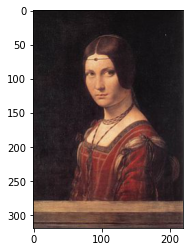

In [14]:
dama = plt.imread('img/dama.jpg')       
dama = resize(dama, (319, 219))
plt.imshow(dama,cmap=plt.cm.gray)


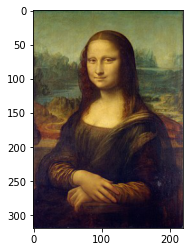

In [15]:
monna = plt.imread('img/monna.jpg')
new_monna = resize(monna, (319, 219))
plt.imshow(new_monna,cmap=plt.cm.gray)


(319, 219, 3)


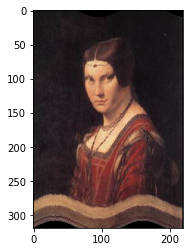

In [16]:
print(dama.shape)
t = 10
w_dama = warp(dama, t)
plt.imshow(w_dama)

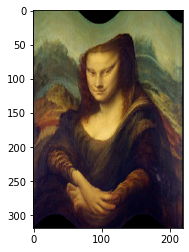

In [17]:
t = 20
w_monna = warp(new_monna, t)
plt.imshow(w_monna)

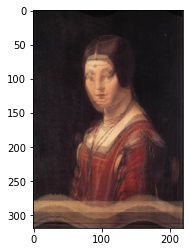

In [18]:
t=0.5
I_td = blending(dama,w_dama,[t]) 
plt.imshow(I_td[1])

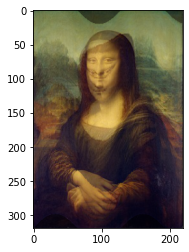

In [19]:
I_tm = blending(w_monna,new_monna,[t]) 
plt.imshow(I_tm[1])

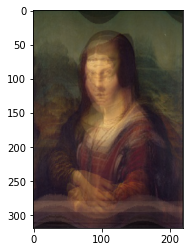

In [20]:
I_t = blending(I_td[1], I_tm[1], [t])

plt.imshow(I_t[1])

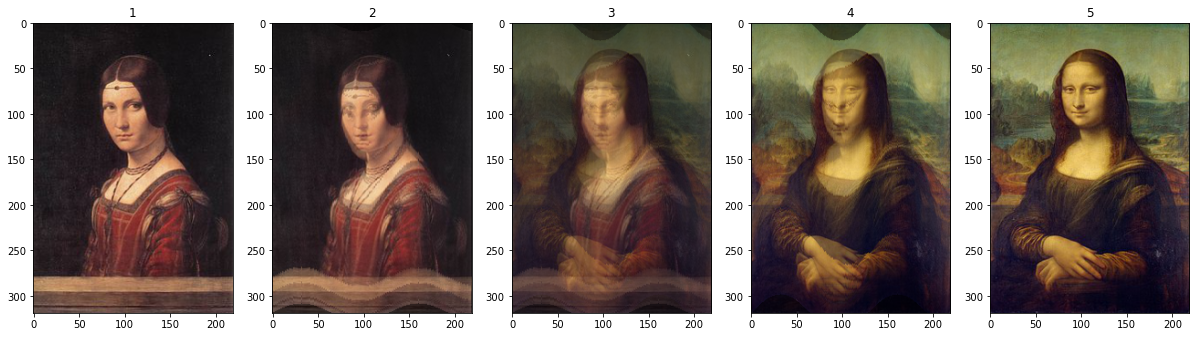

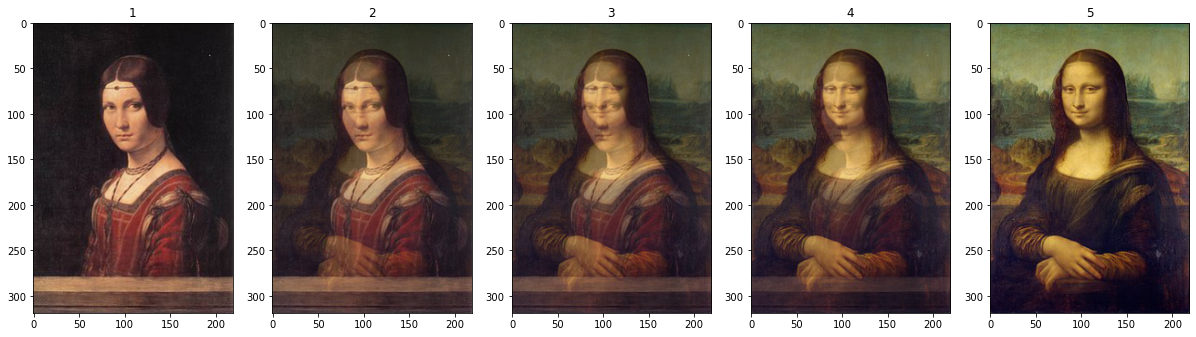

In [21]:
final = []
final.append([])
final.append(dama)
final.append(I_td[1])
final.append(I_t[1])
final.append(I_tm[1])
final.append(new_monna)

plt.figure(figsize=(25,15))

for i in range(1,len(final)):
    plt.subplot(1,len(final),i)
    plt.imshow(final[i])
    plt.title(i)
    
t = [0, 0.3, 0.5, 0.7, 1]
I_t = blending(dama, new_monna, t)

plt.figure(figsize=(25,15))

for i in range(1,len(I_t)):
    plt.subplot(1,len(I_t),i)
    plt.imshow(I_t[i])
    plt.title(i)
    

### Analisi sperimentale:

Per ottenere questa trasformazione, ho applicato rispettivamente alla prima e all'ultima immagine il warp, poi ho fuso le immagini con le rispettive distorsioni creando così le immagini 2 e 4 della sequenza sopra e infine le ho fuse creando l'immagine 3.

Ho scelto le ampiezze dell'onda in modo arbitrario, cercando di far sovrapporre i due visi il più possibile, questo succede solo in parte, e nelle immagini intermedie si crea molto rumore, ma nonostante tutto il risultato è migliore rispetto alla sequenza sotto, dove ho fuso le due immagini senza applicare nessuna trasformazione.



Per migliorare il risultato provo ad applicare delle trasformazioni alle immagini di partenza per allinearle

Di seguito la funzione di traslazione:

In [22]:
def traslate(img, t):
    
    width,height=img.shape[:2] 
    
    dst = np.zeros((width, height, 3))
    
    for u in range(width):
        for v in range(height):
    
            x = u+t[0]
            y = v+t[1]
            
            intx, inty = int(x), int(y)
            
            # bilinear interpolation
            fracx, fracy = x%1, y%1
            #interp = fracx*fracy + (1-fracx)*fracy + fracx*(1-fracy) + (1-fracx)*(1-fracy)
            
            if 0 < x < width-1 and 0 < y < height-1:
                dst[u, v] = fracx*fracy*img[intx, inty]+(1-fracx)*fracy*img[intx+1, inty]+fracx*(1-fracy)*img[intx, inty+1]+(1-fracx)*(1-fracy)*img[intx+1, inty+1]
    return dst

Di seguito prendo dei punti significativi delle due immagini.
Poi traslerò una delle due immagini della media delle distanze tra i punti

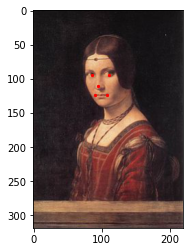

In [23]:
punti1 = np.array([[85, 95], [110, 95], [95, 110], [90, 123], [107, 123]])

plt.imshow(dama, cmap='gray')
plt.scatter(punti1[:, 0], punti1[:, 1], marker=".", color="red", s=20)
plt.show()

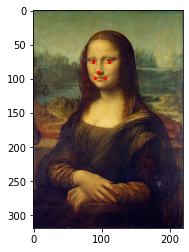

In [24]:
punti2 = np.array([[87, 75], [110, 75], [95, 90], [90, 98], [105, 98]])

plt.imshow(new_monna, cmap='gray')
plt.scatter(punti2[:, 0], punti2[:, 1], marker=".", color="red", s=20)
plt.show()

In [25]:
diff = punti1 - punti2
print(diff)
print(diff[0,:].mean())
print(diff[:,1].mean())


[[-2 20]
 [ 0 20]
 [ 0 20]
 [ 0 25]
 [ 2 25]]
9.0
22.0


(319, 219, 3)


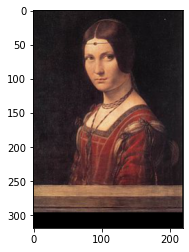

In [26]:
print(dama.shape)
t = [22, 0]
t_dama = traslate(dama, t)
plt.imshow(t_dama)

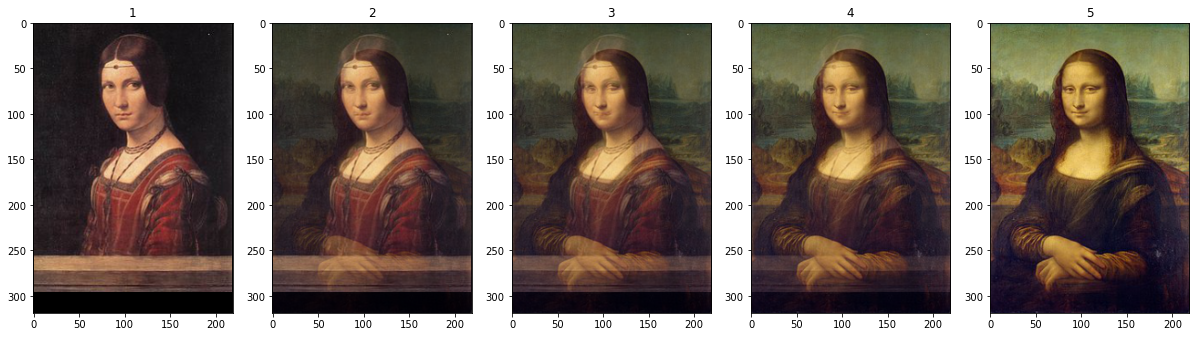

In [27]:
t = [0, 0.3, 0.5, 0.7, 1]
I_t = blending(t_dama, new_monna, t)

plt.figure(figsize=(25,15))

for i in range(1,len(I_t)):
    plt.subplot(1,len(I_t),i)
    plt.imshow(I_t[i])
    plt.title(i)

### Analisi sperimentale:
Applicando una traslazione alla prima immagine, allineando quindi i due visi, si ottiene un morphing più omogeneo

Ora proviamo ad applicare il morphing tra due immagini di gatti, completamente disallineate

(245, 470, 3)


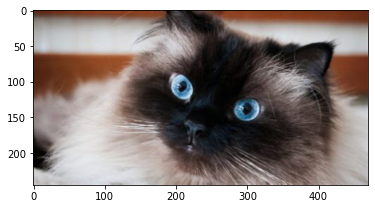

In [28]:
gatto1 = plt.imread('img/gatto1.jpeg')
gatto1 = resize(gatto1, (245,470))
print(gatto1.shape)
#print(gatto1)
plt.imshow(gatto1)


(245, 470, 3)


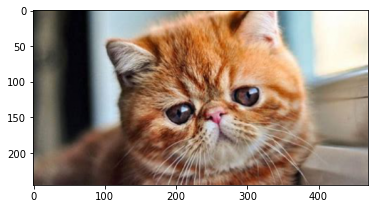

In [29]:
gatto2 = plt.imread('img/gatto2.jpeg')
gatto2 = resize(gatto2, (245,470))
print(gatto2.shape)
#print(gatto2)
plt.imshow(gatto2,cmap=plt.cm.gray)


Provando con l'approccio del warp otteniamo:


In [30]:
g1 = warp(gatto1, 20)
g2 = warp(gatto2, 20)

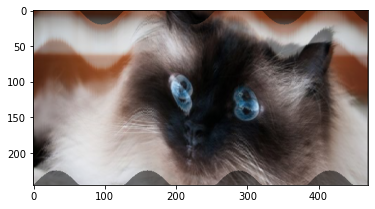

In [31]:
t=[0.5]
t2=[0,0.2,0.5,0.8,1]

Ig1_t=blending(gatto1, g1, t)
plt.imshow(Ig1_t[1])

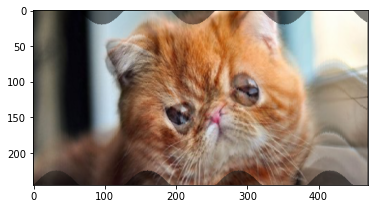

In [32]:
Ig2_t=blending(g2, gatto2, t)
plt.imshow(Ig2_t[1])

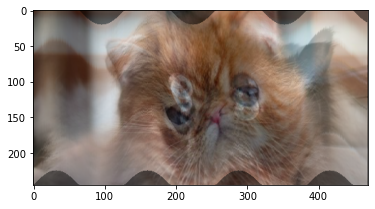

In [33]:
I_t = blending(Ig1_t[1], Ig2_t[1], t)

plt.imshow(I_t[1])

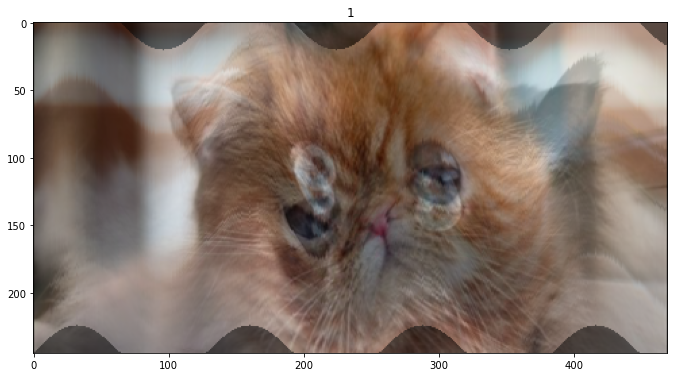

In [34]:
t=[0.5]

I_t = blending(Ig1_t[1],Ig2_t[1],t)  

plt.figure(figsize=(25,15))

for i in range(1,len(I_t)):
    plt.subplot(1,len(I_t),i)
    plt.imshow(I_t[i], cmap='gray')
    plt.title(i)


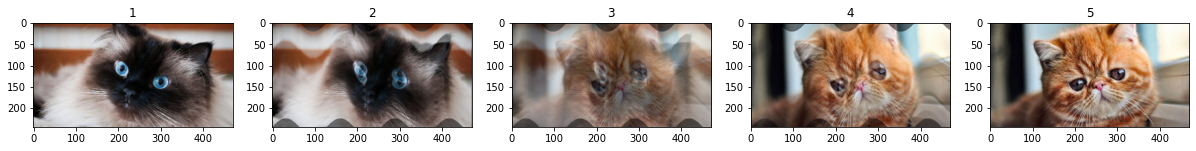

In [35]:
final = []
final.append([])
final.append(gatto1)
final.append(Ig1_t[1])
final.append(I_t[1])
final.append(Ig2_t[1])
final.append(gatto2)

plt.figure(figsize=(25,15))

for i in range(1,len(final)):
    plt.subplot(1,len(final),i)
    plt.imshow(final[i])
    plt.title(i)

### Analisi sperimentale
Il warp effettuato crea molto rumore nel blending tra le due immagini

Come nel caso precedente effettuo trasformazioni su una delle due immagini per allinearla all'altra e creare una trasformazione omogenea.

La prima cosa che si nota è che i gatti sono rivolti in due direzioni diverse; quindi per prima cosa è necessario applicare una traformazione che "specchi" l'immagine rispetto all'asse verticale.

Di seguito la funzione che implementa la trasformazione appena descritta: 

In [36]:
def mirror(img):
    
    width,height=img.shape[:2] 
    
    dst = np.zeros((width, height, 3))
  
    for u in range(width):
        for v in range(height):
    
            x = u
            y = height-v
            #print(y)
            intx, inty = int(x), int(y)
            
            # bilinear interpolation
            fracx, fracy = x%1, y%1
            #interp = fracx*fracy + (1-fracx)*fracy + fracx*(1-fracy) + (1-fracx)*(1-fracy)
            
            if 0 < x < width-1 and 0 < y < height-1:
                dst[u, v] = fracx*fracy*img[intx, inty]+(1-fracx)*fracy*img[intx+1, inty]+fracx*(1-fracy)*img[intx, inty+1]+(1-fracx)*(1-fracy)*img[intx+1, inty+1]
    return dst

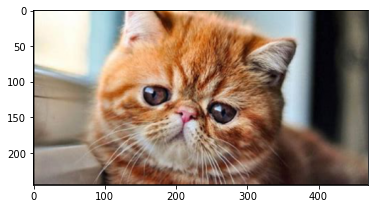

In [37]:
m_gatto = mirror(gatto2)

plt.imshow(m_gatto,cmap=plt.cm.gray)


Le due immagini non sono ancora allineate, quindi come in precedenza prendiamo dei punti significativi sui due musi per applicare una traslazione.

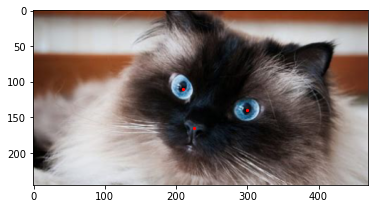

In [38]:
pg1 = np.array([[210, 110], [300, 140], [225, 165]])

plt.imshow(gatto1)
plt.scatter(pg1[:, 0], pg1[:, 1], marker=".", color="red", s=20)
plt.show()

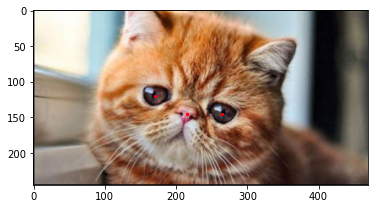

In [39]:
pg2 = np.array([[215, 145], [170, 120], [265, 145]])

plt.imshow(m_gatto)
plt.scatter(pg2[:, 0], pg2[:, 1], marker=".", color="red", s=20)
plt.show()

In [40]:
diff = pg1 - pg2
print(diff)
print(diff[0,:].mean())
print(diff[:,1].mean())

[[ -5 -35]
 [130  20]
 [-40  20]]
-20.0
1.6666666666666667


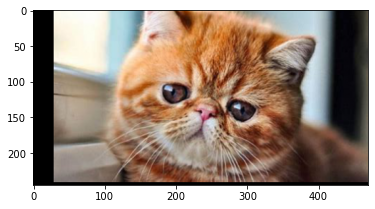

In [41]:
t_gatto = traslate(m_gatto, [2,-28])
plt.imshow(t_gatto,cmap=plt.cm.gray)

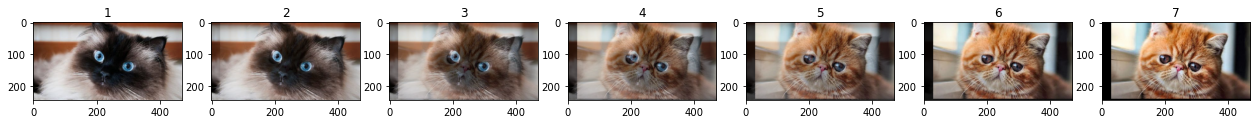

In [42]:
t=[0, 0.1, 0.3, 0.5, 0.7, 0.9, 1]

I_t = blending(gatto1, t_gatto, t)

plt.figure(figsize=(25,15))

for i in range(1,len(I_t)):
    plt.subplot(1,len(I_t),i)
    plt.imshow(I_t[i])
    plt.title(i)

Per perfezionare il morphing applico una lieve rotazione

In [43]:
def rotate(img, t):
    
    width,height=img.shape[:2] 
    
    dst = np.zeros((width, height, 3))
  
    for u in range(width):
        for v in range(height):
    
            x = u*np.cos(t)-v*np.sin(t)
            y = u*np.sin(t)+v*np.cos(t)
            #print(y)
            intx, inty = int(x), int(y)
            
            # bilinear interpolation
            fracx, fracy = x%1, y%1
            #interp = fracx*fracy + (1-fracx)*fracy + fracx*(1-fracy) + (1-fracx)*(1-fracy)
            
            if 0 < x < width-1 and 0 < y < height-1:
                dst[u, v] = fracx*fracy*img[intx, inty]+(1-fracx)*fracy*img[intx+1, inty]+fracx*(1-fracy)*img[intx, inty+1]+(1-fracx)*(1-fracy)*img[intx+1, inty+1]
    return dst

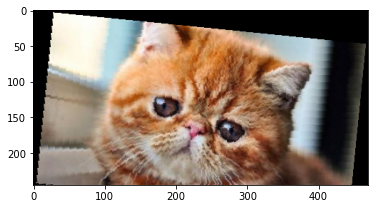

In [44]:
r_gatto = rotate(t_gatto, 0.1)
plt.imshow(r_gatto,cmap=plt.cm.gray)

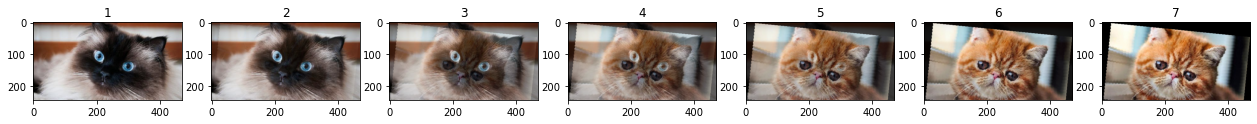

In [45]:
t=[0, 0.1, 0.3, 0.5, 0.7, 0.9, 1]
#I_t = blending(t_gatto, m_gatto, t)
I_t = blending(gatto1, r_gatto, t)

plt.figure(figsize=(25,15))

for i in range(1,len(I_t)):
    plt.subplot(1,len(I_t),i)
    plt.imshow(I_t[i])
    plt.title(i)

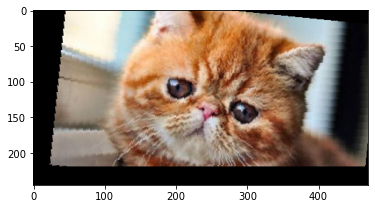

In [46]:
t_gatto = traslate(r_gatto, [25,-20])
plt.imshow(t_gatto,cmap=plt.cm.gray)


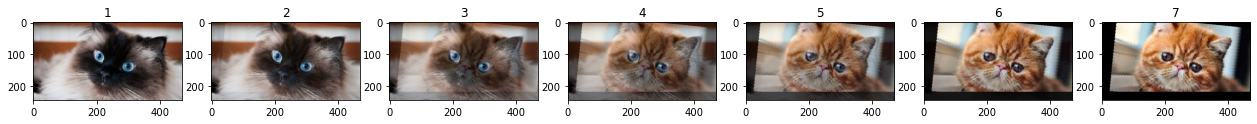

In [47]:
t=[0, 0.1, 0.3, 0.5, 0.7, 0.9, 1]
#I_t = blending(t_gatto, m_gatto, t)
I_t = blending(gatto1, t_gatto, t)

plt.figure(figsize=(25,15))

for i in range(1,len(I_t)):
    plt.subplot(1,len(I_t),i)
    plt.imshow(I_t[i])
    plt.title(i)

### Analisi sperimentale
Applicando una rotazione e un'ulteriore traslazione si ottiene un'ottima sovrapposizione tra le due immagini e un conseguente morphing graduale e omogeneo tra i soggetti.

### Conclusioni(versione1):
Posso dire di avere raggiunto l'obbiettivo in parte in quanto, sono riuscita ad eseguire il blending tra le immagini, questo viene bene su immagini molto allineate, avviene con più difficoltà nelle immagini che non sono allineate di partenza, per questo sono intervenuta con trasformazioni geometriche che mi permettessero di "bilanciare" una delle due immagini per allinearla all'altra. Il mio obbiettivo in partenza era di creare questo allineamento direttamente nel morphing, ma per farlo era necessario implementare delle distorsioni che non sono riuscita a creare.

### Conclusioni(versione2):
Nel notebook implemento una mia versione del morphing, non del tutto affine con la definizione esatta; infatti la funzione di warp che dovrebbe accompagnare il morph non crea il giusto effetto di distorsione che garantirebbe una fusione lineare. Per ovviare alla mancanza ho aggirato il problema applicando delle trasformazioni alle immagini a monte in modo che risultassero già allineate tra loro e il blending tra le due risultasse omogeneo.


### Fonti:

https://my.eng.utah.edu/~cs6640/geometric_trans.pdf

https://www.cs.princeton.edu/courses/archive/spring21/cos426/lectures/Lecture-2.pdf

https://eeweb.engineering.nyu.edu/~yao/EL5123/lecture12_ImageWarping.pdf